# Liveability scoring
Liveability score is essential to measure the importance of various factors consisted of liveability.
<br>
In this project, it is decided to use customized weights by conducting user survey via web service and scoring the liveability based on the weights.
<br>

- First, standardizate the different measurements.
- Second, Rank them by categories.
- Finally, Score and weight them.

## Read the data

In [149]:
import pandas as pd
COL = ["min_distance_to_train", "min_distance_to_hosp", "min_distance_to_poli", "min_distance_to_shop", "population_density", "crime_cases", "weekly_rent"]
sample = pd.read_csv("../../data/curated/merged_dataset/2013_merged_data.csv")
m = sample[COL].to_numpy()
m

array([[3.556825e+01, 2.135025e+01, 2.204660e+01, ..., 8.533000e+03,
        8.600000e+01, 3.000000e+02],
       [7.543550e+00, 7.429720e+00, 6.281770e+00, ..., 1.373900e+04,
        3.600000e+01, 2.150000e+02],
       [5.085341e+01, 3.663541e+01, 8.478000e-02, ..., 8.533000e+03,
        8.600000e+01, 1.750000e+02],
       ...,
       [1.288061e+01, 1.272350e+01, 1.525938e+01, ..., 1.114100e+04,
        5.424000e+03, 3.500000e+02],
       [5.286500e-01, 2.290756e+01, 2.693800e-01, ..., 8.564000e+03,
        1.140000e+02, 2.250000e+02],
       [         nan,          nan,          nan, ..., 5.269000e+03,
        2.100000e+01, 2.000000e+02]])

In [150]:
from sklearn import preprocessing
import numpy as np

## Data standardization

In [151]:
X_train = m
scaler = preprocessing.StandardScaler().fit(X_train)
# scaler
# scaler.mean_
# scaler.scale_

plot histogram

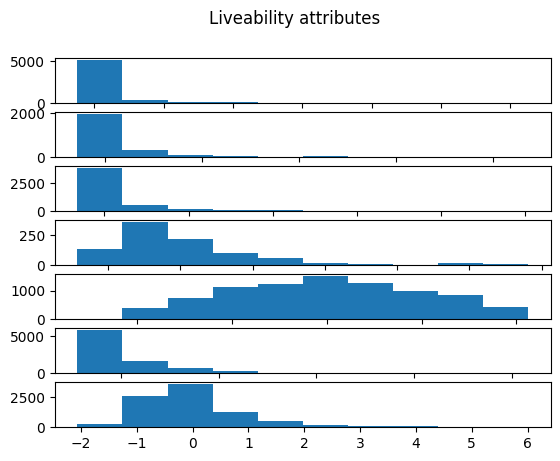

In [152]:
import matplotlib.pyplot as plt
X_scaled = scaler.transform(X_train)
X_scaled
fig, axs = plt.subplots(X_scaled.shape[1])
fig.suptitle('Liveability attributes')
for i in range(0, X_scaled.shape[1]):
    axs[i].hist(X_scaled[:,i])
plt.show()

<b>QQ-plot</b>
<br>
- In QQ-plot, there are strong evidences that most of liveability attributes are not normally distributed.
<br>
- 6th attribute has normal distribution but it is under-dispersed (more concentrated around a central value).
<br>
- Therefore, it is not recommanded to standardise using normal distribution.

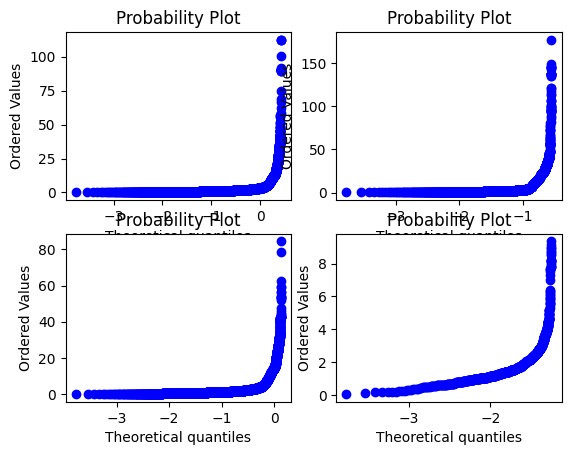

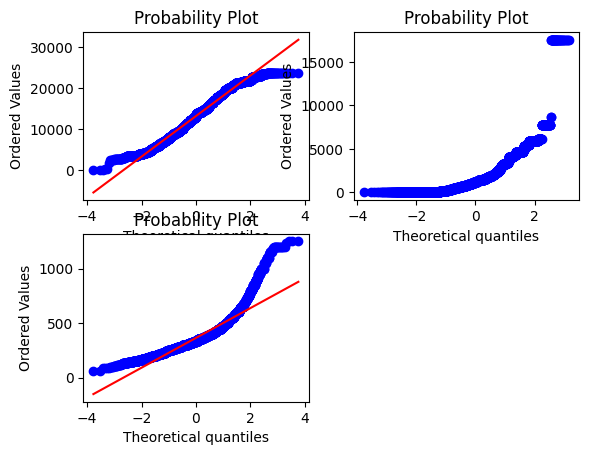

In [153]:
import numpy as np
import scipy.stats as stats
import pylab

# test = np.random.normal(0,1, 1000) # Good example
for i in range(0, 4):
    ax1 = plt.subplot(221+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

for i in range(4, X_scaled.shape[1]):
    ax1 = plt.subplot(217+i)
    measurements = sample[COL[i]].to_numpy()
    stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()


QQ-plot expanded <b>(Log-model)</b>
- Relatively, it doesn't seem to fit well.

/var/folders/sm/l6vrftmd479f6k9xsr1dflsr0000gn/T/ipykernel_25933/3085801141.py:7: RuntimeWarning: invalid value encountered in log
  sm.qqplot(np.log(test), line='45')


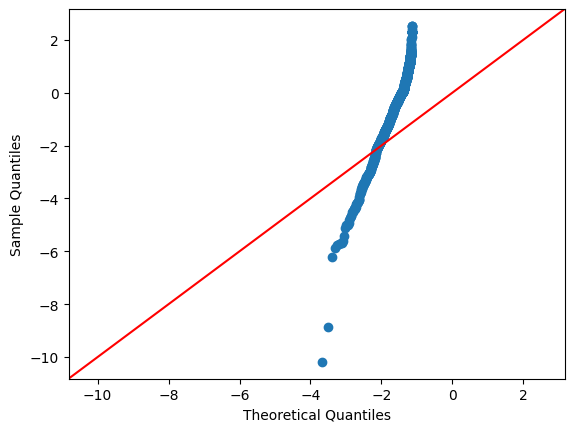

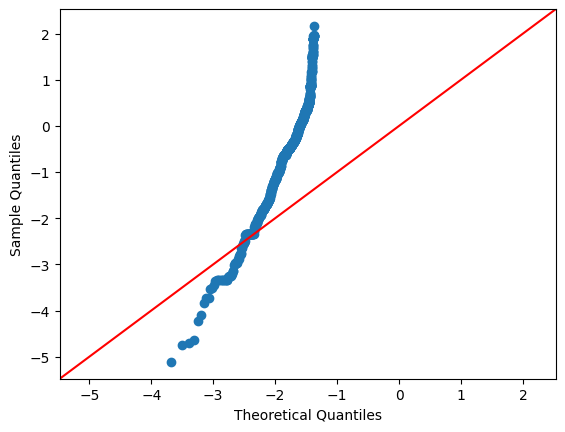

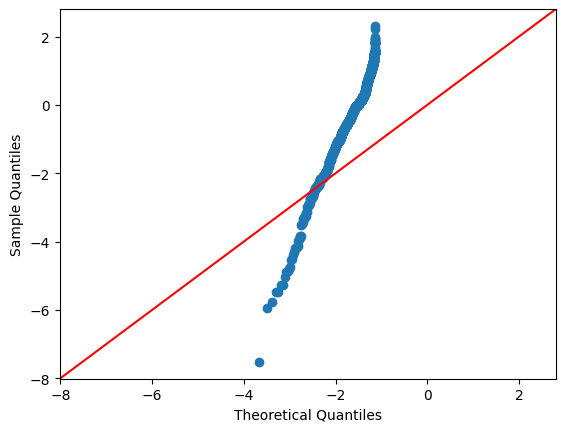

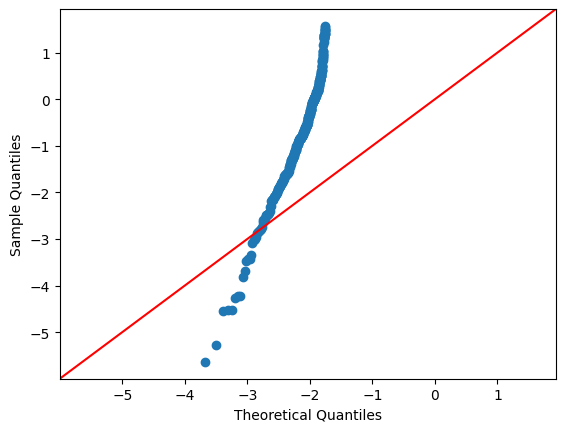

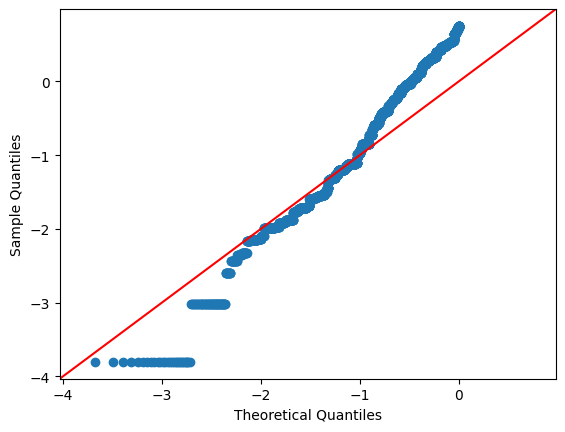

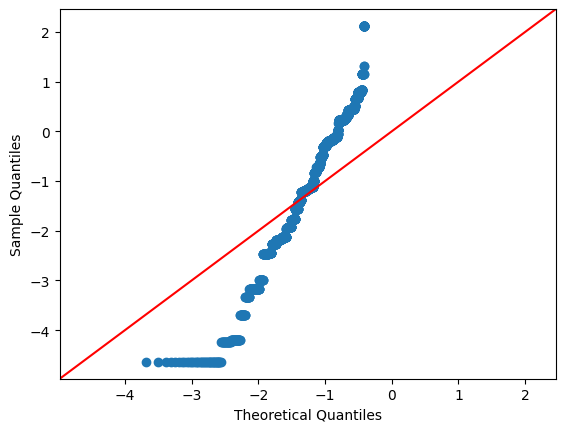

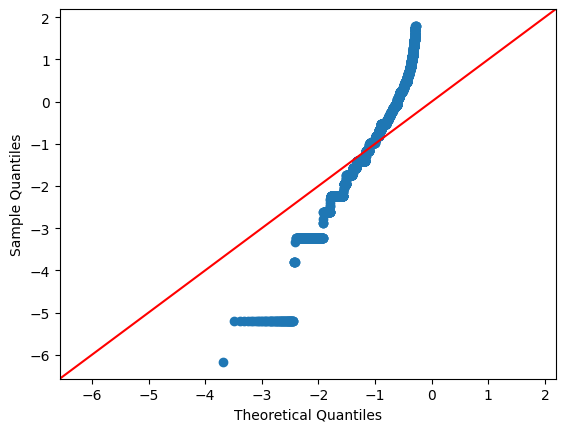

In [154]:
import numpy as np 
import statsmodels.api as sm
import pylab

for i in range(0, X_scaled.shape[1]):
    test = X_scaled[:,i]
    sm.qqplot(np.log(test), line='45')
pylab.show()
    

## Ranking
- As the attributes are not nomally distributed, it is decided to use ranking to score the liveability

In [155]:
ranking = pd.DataFrame()
for col in COL:
    ranking[col+"-rank"] = sample[col].rank()


In [163]:
score = ranking/len(ranking)
score

,min_distance_to_train-rank,min_distance_to_hosp-rank,min_distance_to_poli-rank,min_distance_to_shop-rank,population_density-rank,crime_cases-rank,weekly_rent-rank
0,0.653756,0.238217,0.518782,NaN,0.189571,0.100443,0.354526
1,0.576878,0.193770,0.433971,NaN,0.517266,0.051038,0.085978
2,0.660639,0.268549,0.001283,NaN,0.189571,0.100443,0.030506
3,0.602018,NaN,NaN,NaN,0.857793,0.525082,0.560021
4,0.417697,NaN,NaN,0.096302,0.959403,0.702636,0.252508
...,...,...,...,...,...,...,...
8567,0.268549,0.102193,0.232851,NaN,0.414722,0.651365,0.455028
8568,0.072562,NaN,0.111409,NaN,0.616426,0.729410,0.560021
8569,0.614092,0.212203,0.501633,NaN,0.364967,0.960278,0.560021
8570,0.059729,0.243584,0.010033,NaN,0.193245,0.113859,0.107035


## Scoring

In [164]:
def liveability_scoring(scores, cols, weights):
    """Takes score data, list of weights and column names, return the total liveability score based on the weights"""
    # check the validation of weight list
    if len(weights) != len(scores):
        return np.nan
    if sum(weights) != 1:
        return np.nan
    for i, rows in scores:
        list_sum = 0
        for n in range(0, len(cols)):
            list_sum = list_sum + (scores[i, cols[n]]*weights[n])
        scores[i, "total_liveability_score"] = list_sum
    return scores